# Redes Neuronales

In [3]:
!pip install tensorflow

In [4]:
'''Estas bibliotecas son muy utilizadas en el ámbito del aprendizaje automático y la inteligencia artificial. 
TensorFlow proporciona herramientas para construir y entrenar modelos de aprendizaje automático, 
mientras que NumPy ofrece funciones y operaciones eficientes para trabajar con matrices y realizar 
cálculos numéricos. '''

import tensorflow as tf #keras
import numpy as np

In [5]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float) #entrada
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float) #Salida

type(celsius) 

numpy.ndarray

In [6]:
# Crear una capa densa (fully connected)
# - 'units=1': La capa tiene un solo nodo, común en modelos de regresión lineal.
# - 'input_shape=[1]': La capa espera entradas unidimensionales.
capa = tf.keras.layers.Dense(units=1, input_shape=[1]) 

# Crear un modelo secuencial
# - Se pasa la capa creada anteriormente como único elemento en la lista.
modelo = tf.keras.Sequential([capa])

In [7]:
# Configurar el modelo para el entrenamiento
#Optimizador= Adam es un algoritmo de optimización que ajusta automáticamente la tasa de aprendizaje 
#durante el entrenamiento. La tasa de aprendizaje está configurada en 0.1
#Loss= Se establece la función de pérdida como el error cuadrático medio (residuales).
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [8]:
# Entrenar el modelo utilizando los datos de entrada 'celsius' y salida 'fahrenheit'
# - 'epochs=380': Número de veces que el modelo pasará por todos los datos de entrenamiento 
# durante el entrenamiento.
# - 'verbose=False': Desactiva la visualización de información detallada durante el entrenamiento.
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=380, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


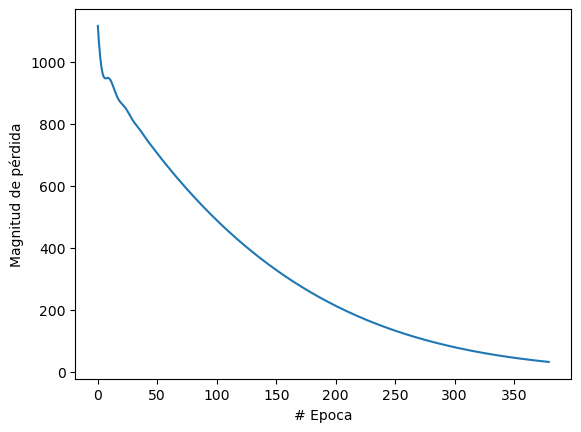

In [9]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
# Graficar el historial de pérdida durante el entrenamiento
plt.plot(historial.history["loss"])

In [10]:
print("Hagamos una predicción!")
resultado = modelo.predict([46])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 163ms/step
El resultado es [[111.11482]] fahrenheit!


In [11]:
print("Variables internas del modelo")
print("            peso     " + "                         sesgo")

print(capa.get_weights())

Variables internas del modelo
            peso                              sesgo
[array([[1.8468895]], dtype=float32), array([26.157907], dtype=float32)]


In [12]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
oculta3 = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, oculta3])

In [13]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [14]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=80, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


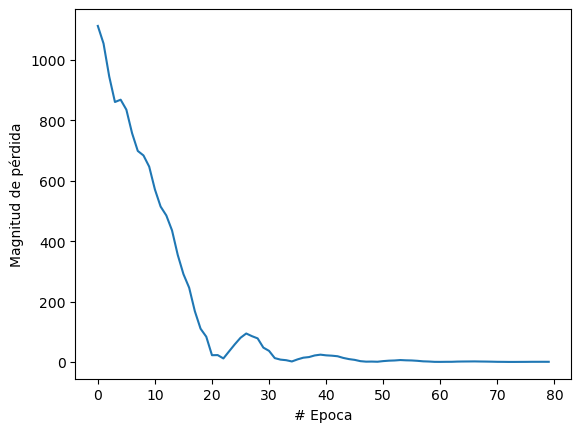

In [15]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [16]:
print("Hagamos una predicción!")
# Realizar una predicción utilizando el modelo entrenado
resultado = modelo.predict([46])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 115ms/step
El resultado es [[114.73212]] fahrenheit!


In [17]:
#Guardar el modelo en formato h5
modelo.save('celsius_fahrenheit.h5')

/Users/nazlyr/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# Crear el modelo de red neuronal con más neuronas

import numpy as np
import tensorflow as tf
from tensorflow import keras

# Datos de entrenamiento
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)


# Crear un modelo secuencial
model = keras.Sequential([
    # Primera capa densa con 1000 neuronas y especificando la forma de entrada como [1]
    keras.layers.Dense(units=1000, input_shape=[1]),  # Capa densa con N neuronas.
    # Segunda capa densa con 5 neuronas de salida
    keras.layers.Dense(units=1)  # Capa con N neuronas de salida.
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(celsius, fahrenheit, epochs=1000, verbose=0)

# Realizar una predicción
celsius_to_predict = 45.8
predicted_fahrenheit = model.predict([celsius_to_predict])
print(f"{celsius_to_predict} grados Celsius son aproximadamente {predicted_fahrenheit} grados Fahrenheit.")


1/1 [==============================] - 0s 89ms/step
45.8 grados Celsius son aproximadamente [[114.29863]] grados Fahrenheit.


In [28]:
# Evaluar el modelo
from sklearn.metrics import mean_squared_error
import math

# Realizar predicciones para los datos de entrenamiento
predicciones_entrenamiento = model.predict(celsius)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(fahrenheit, predicciones_entrenamiento)

# Calcular la raíz cuadrada del error cuadrático medio (RMSE)
rmse = math.sqrt(mse)

# Imprimir las métricas
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz Cuadrada del Error Cuadrático Medio (RMSE): {rmse}")

1/1 [==============================] - 0s 28ms/step
Error Cuadrático Medio (MSE): 0.06304514368873372
Raíz Cuadrada del Error Cuadrático Medio (RMSE): 0.2510879202365851


Puedes ajustar y utilizar otras métricas según tus necesidades específicas. Además, ten en cuenta que estas métricas son específicas para los datos de entrenamiento. Para una evaluación más completa, podrías dividir tus datos en conjuntos de entrenamiento y prueba y calcular las métricas en el conjunto de prueba para evaluar la generalización del modelo a datos no vistos.